## Randall Mencias
## Juan Francisco Cisneros
## Josue Cardenas

### DESCRIPCION DEL PROYECTO
- ....

### LIBRERIAS

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re 
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # text preprocessing


### ANALISIS EXPLORATORIO DE DATOS

#### CARGA DE DATOS

In [417]:
# Where data is stored
pathTest = "../resources/clean_data/test_clean.csv"
pathTrain = "../resources/clean_data/train_clean.csv"

# Read data
dfTest = pd.read_csv(pathTest)
dfTrain = pd.read_csv(pathTrain)

# Size of the train and test data
print("Train data size: ", dfTrain.shape)
print("Test data size: ", dfTest.shape)

Train data size:  (161297, 7)
Test data size:  (53200, 7)


In [418]:
dfTest.head()

uniqueID drugName                  condition  \
0     53641   Alesse  Abnormal Uterine Bleeding   
1    195548   Aviane  Abnormal Uterine Bleeding   
2    195659   Aviane  Abnormal Uterine Bleeding   
3    195622   Aviane  Abnormal Uterine Bleeding   
4    147702   Aviane  Abnormal Uterine Bleeding   

                                              review  rating         date  \
0  "I&#039;ve been using Alesse 28 for a little o...      10    22-Jan-14   
1  "I have been on Aviane for almost three months...      10  2001-Mar-12   
2  "My doctor put me on Aviane to suppress my per...       9    16-Aug-11   
3  "It&#039;s only been a month so I can&#039;t g...       8    10-Sep-12   
4  "I have been on Aviane for about a year and a ...       9    13-Mar-10   

   usefulCount  
0            8  
1            6  
2            9  
3            4  
4            4

In [419]:
dfTrain.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating         date  \
0  "It has no side effect, I take it in combinati...       9    20-May-12   
1  "My son is halfway through his fourth week of ...       8    27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5    14-Dec-09   
3  "This is my first time using any form of birth...       8  2003-Nov-15   
4  "Suboxone has completely turned my life around...       9    27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

#### Plot Columns

In [420]:
print("Test data shape, Rows and Columns: ", dfTest.shape)
print("Train data shape, Rows and Columns: ", dfTrain.shape)
print()
print("Test data columns: ", dfTest.columns)
print("Train data columns: ", dfTrain.columns)

Test data shape, Rows and Columns:  (53200, 7)
Train data shape, Rows and Columns:  (161297, 7)

Test data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Train data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [421]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [422]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53200 entries, 0 to 53199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53200 non-null  int64 
 1   drugName     53200 non-null  object
 2   condition    53200 non-null  object
 3   review       53200 non-null  object
 4   rating       53200 non-null  int64 
 5   date         53200 non-null  object
 6   usefulCount  53200 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.8+ MB


In [423]:
dfTrain.describe()

uniqueID         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [424]:
# Check for missing values
dfTrain.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [425]:
# Drop all rows with missing values
dfTrain.dropna(inplace=True)
dfTrain.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [426]:
dfTest.describe()

uniqueID        rating   usefulCount
count   53200.000000  53200.000000  53200.000000
mean   116465.986485      6.978289     28.170282
std     67001.804385      3.286389     36.284596
min         0.000000      1.000000      0.000000
25%     58371.500000      4.000000      6.000000
50%    116418.500000      8.000000     16.000000
75%    174645.250000     10.000000     36.000000
max    232284.000000     10.000000    949.000000

In [427]:
# Check for missing values
dfTest.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

#### Plot Columns

##### Rating

In [428]:
# Raitings distribution
dfTrain['rating'].value_counts()

10    50745
9     27379
1     21504
8     18791
7      9395
5      7959
2      6879
3      6465
6      6301
4      4980
Name: rating, dtype: int64

<Axes: title={'center': 'Ratings distribution in train data'}, xlabel='Rating', ylabel='Count'>

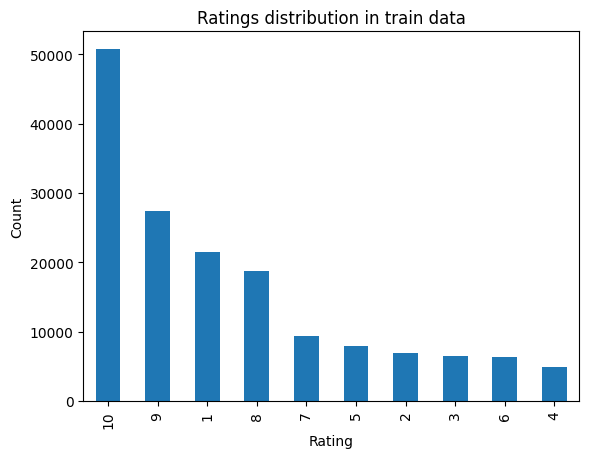

In [429]:
dfTrain['rating'].value_counts().plot(kind='bar', title='Ratings distribution in train data',xlabel='Rating', ylabel='Count')


In [430]:
dfTest['rating'].value_counts()

10    16868
9      9072
1      7230
8      6087
7      3056
5      2672
2      2308
3      2185
6      2090
4      1632
Name: rating, dtype: int64

<Axes: title={'center': 'Ratings distribution in test data'}, xlabel='Rating', ylabel='Count'>

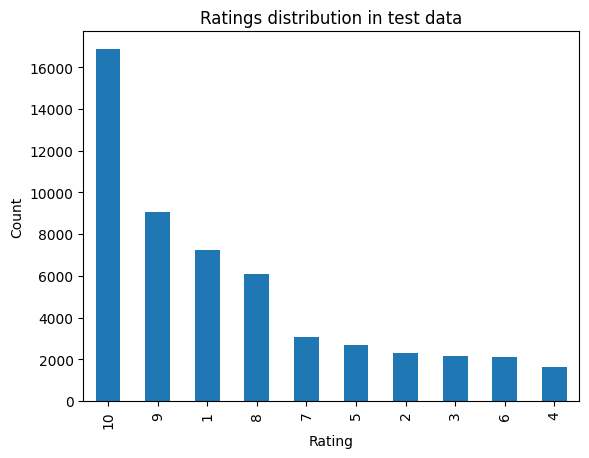

In [431]:
dfTest['rating'].value_counts().plot(kind='bar', title='Ratings distribution in test data',xlabel='Rating', ylabel='Count')

#### Matrix Correlation

In [432]:
# Plot Correlation Matrix
corr = dfTrain.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_30504/2031966965.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfTrain.corr()


In [433]:
corr = dfTest.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_30504/1667596228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfTest.corr()


As we can see, there is a strong correlation between the variables, which is expected since they are all related to the same topic.

#### Drug Name Label Encoding

In [434]:
drugName = dfTrain['drugName'].value_counts()
drugName

Levonorgestrel                       3631
Etonogestrel                         3321
Ethinyl estradiol / norethindrone    2750
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2033
                                     ... 
Colace                                  1
DermaZinc Shampoo                       1
Lillow                                  1
Magaldrate / simethicone                1
Grifulvin V                             1
Name: drugName, Length: 3431, dtype: int64

In [435]:
# Transform DrugName to a categorical variable, save the categories and the number of categories
dfTrain['drugName'] = dfTrain['drugName'].astype('category')
# Save the categories in between drugname and condition
dfTrain['drugName_cat'] = dfTrain['drugName'].cat.codes
dfTrain.sort_values(by=['drugName'], inplace=True)
dfTrain

uniqueID                              drugName  \
9892      163935             A + D Cracked Skin Relief   
18402     131173                            A / B Otic   
77682      70749  Abacavir / dolutegravir / lamivudine   
59740      70709  Abacavir / dolutegravir / lamivudine   
90400      70706  Abacavir / dolutegravir / lamivudine   
...          ...                                   ...   
47965     163126                                  ella   
159774    163077                                  ella   
24189      53297                                femhrt   
578        53296                                femhrt   
127350     53300                                femhrt   

                                         condition  \
9892                      Bacterial Skin Infection   
18402                                 Otitis Media   
77682                                HIV Infection   
59740                                HIV Infection   
90400                                HIV Infection   
...                                            ...   
47965                      Emergency Contraception   
159774                     Emergency Contraception   
24189   0</span> users found this comment helpful.   
578                        Postmenopausal Symptoms   
127350                                        Acne   

                                                   review  rating  \
9892    "I have severe cracked skin on my hands.  I&#0...      10   
18402   "It numbs the pain. It makes my ear feel heavi...      10   
77682   "Update on prior review:  after being on trium...      10   
59740   "I started taking Triumeq almost two years aft...       9   
90400   "After taking complera for 5 years, switched t...       4   
...                                                   ...     ...   
47965   "I took Ella 3 days after a little accident ha...       8   
159774  "I had a two min unprotected  sex with my bf, ...       2   
24189   "I was on femHRT for four months and had BV (b...       1   
578     "This medication completely changed my life fo...      10   
127350  "Recently switched from birth conrtol which ke...       1   

               date  usefulCount  drugName_cat  
9892    2007-Dec-09            6             0  
18402     23-Sep-09           20             1  
77682     30-Sep-15           16             2  
59740   2001-Sep-16           17             2  
90400   2007-Oct-16           10             2  
...             ...          ...           ...  
47965     30-Mar-17           21          3429  
159774  2006-Oct-17            1          3429  
24189     29-Nov-10            0          3430  
578       11-Jan-11           42          3430  
127350    24-Jan-10            2          3430  

[160398 rows x 8 columns]

In [436]:
# Number of categories in train 
print("Number of categories in train data: ", dfTrain['drugName_cat'].nunique())

Number of categories in train data:  3431


In [437]:
# Show DrugName and its unique DrugName_cat
dfTrain[['drugName', 'drugName_cat']].drop_duplicates().sort_values('drugName_cat')

drugName  drugName_cat
9892               A + D Cracked Skin Relief             0
18402                             A / B Otic             1
77682   Abacavir / dolutegravir / lamivudine             2
40360     Abacavir / lamivudine / zidovudine             3
21862                              Abatacept             4
...                                      ...           ...
31617                                  Zyvox          3426
50955                                ZzzQuil          3427
59226                  depo-subQ provera 104          3428
106729                                  ella          3429
24189                                 femhrt          3430

[3431 rows x 2 columns]

<Axes: title={'center': 'DrugName_Cat and the number of appearances'}, xlabel='DrugName_Cat', ylabel='Count'>

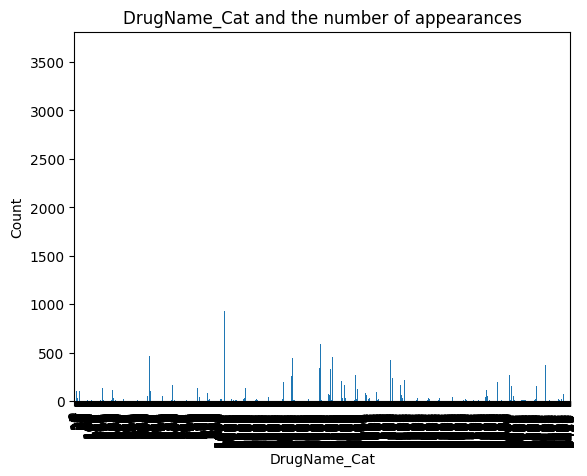

In [438]:
# in a graph, plot the DrugName_Cat and the number of appearances
drugNameCat = dfTrain['drugName_cat'].value_counts().sort_index()
# graph only the first 20 categories
drugNameCat.plot(kind='bar', title='DrugName_Cat and the number of appearances',xlabel='DrugName_Cat', ylabel='Count')


In [439]:
# DrugName of the test data
drugNameTest = dfTest['drugName'].value_counts()
drugNameTest

Levonorgestrel                       1265
Etonogestrel                         1081
Ethinyl estradiol / norethindrone     869
Nexplanon                             734
Ethinyl estradiol / norgestimate      649
                                     ... 
Guarana                                 1
Berinert                                1
Firazyr                                 1
Icatibant                               1
Yellow fever vaccine                    1
Name: drugName, Length: 2629, dtype: int64

In [440]:
# Not all drug names in the test data are in the train data
# Put in a map the drug names of the test data with its DrugName_Cat
drugNameTestMap = {}
for drugName in drugNameTest.index:
    if drugName in dfTrain['drugName'].values:
        drugNameTestMap[drugName] = dfTrain[dfTrain['drugName'] == drugName]['drugName_cat'].values[0]
    else:
        drugNameTestMap[drugName] = -1
# show me the "ella" drug category
drugNameTestMap

{'Levonorgestrel': 1745,
 'Etonogestrel': 1186,
 'Ethinyl estradiol / norethindrone': 1181,
 'Nexplanon': 2145,
 'Ethinyl estradiol / norgestimate': 1182,
 'Ethinyl estradiol / levonorgestrel': 1179,
 'Phentermine': 2413,
 'Sertraline': 2799,
 'Escitalopram': 1147,
 'Mirena': 2018,
 'Implanon': 1556,
 'Gabapentin': 1345,
 'Bupropion': 517,
 'Miconazole': 1987,
 'Duloxetine': 1038,
 'Venlafaxine': 3227,
 'Tramadol': 3068,
 'Clonazepam': 724,
 'Citalopram': 683,
 'Medroxyprogesterone': 1906,
 'Bupropion / naltrexone': 518,
 'Varenicline': 3213,
 'Contrave': 777,
 'Lexapro': 1753,
 'Metronidazole': 1978,
 'Drospirenone / ethinyl estradiol': 1026,
 'Zoloft': 3391,
 'Cymbalta': 825,
 'Tioconazole': 3036,
 'Depo-Provera': 888,
 'Liraglutide': 1784,
 'Skyla': 2829,
 'Fluoxetine': 1308,
 'Quetiapine': 2597,
 'Lo Loestrin Fe': 1793,
 'Alprazolam': 162,
 'Amitriptyline': 195,
 'Chantix': 628,
 'Doxycycline': 1014,
 'Desvenlafaxine': 905,
 'Trazodone': 3080,
 'Suprep Bowel Prep Kit': 2923,
 'Paro

In [441]:
# Lets transform the drugName of the test data to DrugName_Cat, using the map
dfTest['drugName_cat'] = dfTest['drugName'].map(drugNameTestMap)
dfTest

uniqueID    drugName                   condition  \
0         53641      Alesse   Abnormal Uterine Bleeding   
1        195548      Aviane   Abnormal Uterine Bleeding   
2        195659      Aviane   Abnormal Uterine Bleeding   
3        195622      Aviane   Abnormal Uterine Bleeding   
4        147702      Aviane   Abnormal Uterine Bleeding   
...         ...         ...                         ...   
53195    164454  Diclofenac                 zen Shoulde   
53196     87420    Naproxen                 zen Shoulde   
53197    111788     Relafen                 zen Shoulde   
53198     18328    Voltaren                 zen Shoulde   
53199     35532    Prilosec  Zollinger-Ellison Syndrome   

                                                  review  rating         date  \
0      "I&#039;ve been using Alesse 28 for a little o...      10    22-Jan-14   
1      "I have been on Aviane for almost three months...      10  2001-Mar-12   
2      "My doctor put me on Aviane to suppress my per...       9    16-Aug-11   
3      "It&#039;s only been a month so I can&#039;t g...       8    10-Sep-12   
4      "I have been on Aviane for about a year and a ...       9    13-Mar-10   
...                                                  ...     ...          ...   
53195  "The medication has been somewhat helpful with...       5    24-Dec-14   
53196  "Prescribed 500 mg for pain in right shoulder ...       1    24-Jun-17   
53197  "Very helpful for my frozen shoulder pain with...       9    12-Nov-11   
53198  "The medication has been somewhat helpful with...       5    24-Dec-14   
53199  "I have a hiatal hernia which can cause bad re...      10  2002-Nov-14   

       usefulCount  drugName_cat  
0                8           128  
1                6           333  
2                9           333  
3                4           333  
4                4           333  
...            ...           ...  
53195           22           944  
53196            2          2100  
53197           38          2644  
53198           22          3288  
53199           43          2512  

[53200 rows x 8 columns]

<Axes: title={'center': 'DrugName_Cat and the number of appearances'}, xlabel='DrugName_Cat', ylabel='Count'>

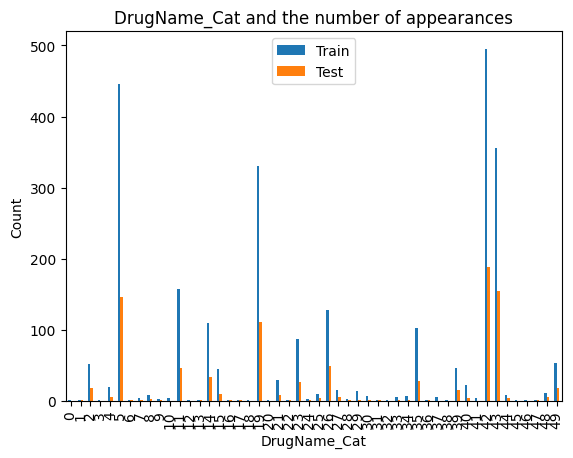

In [442]:
# Compare the count of DrugName_cat in train and test data in a graph
drugNameCatTrain = dfTrain['drugName_cat'].value_counts().sort_index()
drugNameCatTest = dfTest['drugName_cat'].value_counts().sort_index()
# in the same graph, plot the DrugName_Cat and the number of appearances of train and test data
drugNamesCat = pd.concat([drugNameCatTrain, drugNameCatTest], axis=1)
drugNamesCat.columns = ['Train', 'Test']
drugNamesCat[0:50].plot(kind='bar', title='DrugName_Cat and the number of appearances',xlabel='DrugName_Cat', ylabel='Count')

#### Condition Label Encoding

In [443]:
# if condition starts with a number, it will be deleted
dfTrain = dfTrain[~dfTrain['condition'].str.startswith(('0','1','2','3','4','5','6','7','8','9'))]
# Show Condition and its unique Condition_cat
# Delete Nan
dfTrain = dfTrain.dropna()


In [444]:
conditionTrain = dfTrain['condition'].value_counts()
conditionTrain

Birth Control                              28788
Depression                                  9069
Pain                                        6145
Anxiety                                     5904
Acne                                        5588
                                           ...  
m Pain Disorde                                 1
acial Lipoatrophy                              1
Dermatitis Herpeti                             1
Cerebral Edema                                 1
Hyperuricemia Secondary to Chemotherapy        1
Name: condition, Length: 811, dtype: int64

In [445]:
# Transform Condition to a categorical variable, save the categories and the number of categories
dfTrain['condition'] = dfTrain['condition'].astype('category')
# Save the categories in between drugname and condition
dfTrain['condition_cat'] = dfTrain['condition'].cat.codes
dfTrain

uniqueID                              drugName  \
9892      163935             A + D Cracked Skin Relief   
18402     131173                            A / B Otic   
77682      70749  Abacavir / dolutegravir / lamivudine   
59740      70709  Abacavir / dolutegravir / lamivudine   
90400      70706  Abacavir / dolutegravir / lamivudine   
...          ...                                   ...   
126244    163064                                  ella   
47965     163126                                  ella   
159774    163077                                  ella   
578        53296                                femhrt   
127350     53300                                femhrt   

                       condition  \
9892    Bacterial Skin Infection   
18402               Otitis Media   
77682              HIV Infection   
59740              HIV Infection   
90400              HIV Infection   
...                          ...   
126244   Emergency Contraception   
47965    Emergency Contraception   
159774   Emergency Contraception   
578      Postmenopausal Symptoms   
127350                      Acne   

                                                   review  rating  \
9892    "I have severe cracked skin on my hands.  I&#0...      10   
18402   "It numbs the pain. It makes my ear feel heavi...      10   
77682   "Update on prior review:  after being on trium...      10   
59740   "I started taking Triumeq almost two years aft...       9   
90400   "After taking complera for 5 years, switched t...       4   
...                                                   ...     ...   
126244  "I wanted to share my experience particularly ...      10   
47965   "I took Ella 3 days after a little accident ha...       8   
159774  "I had a two min unprotected  sex with my bf, ...       2   
578     "This medication completely changed my life fo...      10   
127350  "Recently switched from birth conrtol which ke...       1   

               date  usefulCount  drugName_cat  condition_cat  
9892    2007-Dec-09            6             0             80  
18402     23-Sep-09           20             1            515  
77682     30-Sep-15           16             2            282  
59740   2001-Sep-16           17             2            282  
90400   2007-Oct-16           10             2            282  
...             ...          ...           ...            ...  
126244    28-Nov-17            2          3429            230  
47965     30-Mar-17           21          3429            230  
159774  2006-Oct-17            1          3429            230  
578       11-Jan-11           42          3430            569  
127350    24-Jan-10            2          3430              7  

[159498 rows x 9 columns]

In [446]:
# Number of categories in train 
print("Number of categories in train data: ", dfTrain['condition_cat'].nunique())

Number of categories in train data:  811


<Axes: title={'center': 'Condition_Cat and the number of appearances'}, xlabel='Condition_Cat', ylabel='Count'>

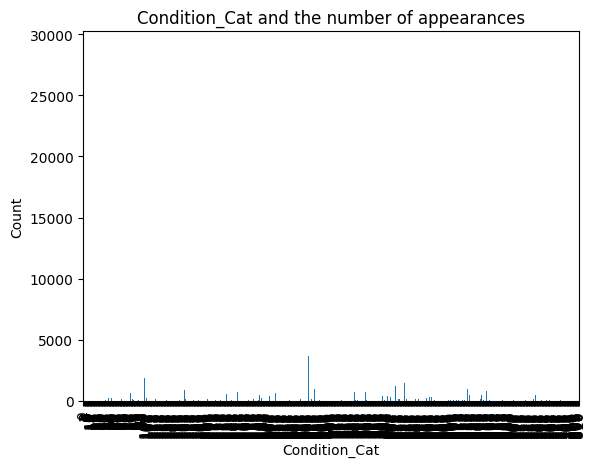

In [447]:
# in a graph, plot the Condition_Cat and the number of appearances
conditionCat = dfTrain['condition_cat'].value_counts().sort_index()
# graph only the first 20 categories
conditionCat.plot(kind='bar', title='Condition_Cat and the number of appearances',xlabel='Condition_Cat', ylabel='Count')

In [448]:
# Condition of the test data
conditionTest = dfTest['condition'].value_counts()
conditionTest

Birth Control                           9648
Depression                              3095
Pain                                    2100
Anxiety                                 1908
Acne                                    1847
                                        ... 
Aspergillosis, Aspergilloma                1
Oppositional Defiant Disorde               1
Oral and Dental Conditions                 1
Organ Transplant, Rejection Reversal       1
Zollinger-Ellison Syndrome                 1
Name: condition, Length: 664, dtype: int64

In [449]:
# Not all conditions in the test data are in the train data
# Put in a map the conditions of the test data with its Condition_Cat
conditionTestMap = {}
for condition in conditionTest.index:
    if condition in dfTrain['condition'].values:
        conditionTestMap[condition] = dfTrain[dfTrain['condition'] == condition]['condition_cat'].values[0]
    else:
        conditionTestMap[condition] = -1

conditionTestMap

{'Birth Control': 92,
 'Depression': 189,
 'Pain': 521,
 'Anxiety': 52,
 'Acne': 7,
 'Bipolar Disorde': 91,
 'Weight Loss': 766,
 'Insomnia': 368,
 'Obesity': 490,
 'ADHD': 0,
 'Emergency Contraception': 230,
 'Vaginal Yeast Infection': 751,
 'Diabetes, Type 2': 200,
 'High Blood Pressure': 313,
 'Smoking Cessation': 670,
 'Abnormal Uterine Bleeding': 4,
 'Bowel Preparation': 100,
 'Migraine': 432,
 'ibromyalgia': 787,
 'Anxiety and Stress': 53,
 'Constipation': 158,
 'Major Depressive Disorde': 414,
 'Chronic Pain': 142,
 'Panic Disorde': 525,
 'Migraine Prevention': 433,
 'Urinary Tract Infection': 745,
 'Opiate Dependence': 501,
 'Osteoarthritis': 510,
 'Muscle Spasm': 446,
 'Erectile Dysfunction': 241,
 'Generalized Anxiety Disorde': 264,
 'Allergic Rhinitis': 22,
 'Irritable Bowel Syndrome': 378,
 'Rheumatoid Arthritis': 628,
 'Bacterial Infection': 79,
 'Cough': 165,
 'Sinusitis': 659,
 'Nausea/Vomiting': 461,
 'GERD': 252,
 'Hepatitis C': 300,
 'Restless Legs Syndrome': 625,
 'H

In [450]:
# Lets transform the condition of the test data to condition_cat, using the map
dfTest['condition_cat'] = dfTest['condition'].map(conditionTestMap)
dfTest

uniqueID    drugName                   condition  \
0         53641      Alesse   Abnormal Uterine Bleeding   
1        195548      Aviane   Abnormal Uterine Bleeding   
2        195659      Aviane   Abnormal Uterine Bleeding   
3        195622      Aviane   Abnormal Uterine Bleeding   
4        147702      Aviane   Abnormal Uterine Bleeding   
...         ...         ...                         ...   
53195    164454  Diclofenac                 zen Shoulde   
53196     87420    Naproxen                 zen Shoulde   
53197    111788     Relafen                 zen Shoulde   
53198     18328    Voltaren                 zen Shoulde   
53199     35532    Prilosec  Zollinger-Ellison Syndrome   

                                                  review  rating         date  \
0      "I&#039;ve been using Alesse 28 for a little o...      10    22-Jan-14   
1      "I have been on Aviane for almost three months...      10  2001-Mar-12   
2      "My doctor put me on Aviane to suppress my per...       9    16-Aug-11   
3      "It&#039;s only been a month so I can&#039;t g...       8    10-Sep-12   
4      "I have been on Aviane for about a year and a ...       9    13-Mar-10   
...                                                  ...     ...          ...   
53195  "The medication has been somewhat helpful with...       5    24-Dec-14   
53196  "Prescribed 500 mg for pain in right shoulder ...       1    24-Jun-17   
53197  "Very helpful for my frozen shoulder pain with...       9    12-Nov-11   
53198  "The medication has been somewhat helpful with...       5    24-Dec-14   
53199  "I have a hiatal hernia which can cause bad re...      10  2002-Nov-14   

       usefulCount  drugName_cat  condition_cat  
0                8           128              4  
1                6           333              4  
2                9           333              4  
3                4           333              4  
4                4           333              4  
...            ...           ...            ...  
53195           22           944            810  
53196            2          2100            810  
53197           38          2644            810  
53198           22          3288            810  
53199           43          2512            773  

[53200 rows x 9 columns]

In [451]:
# Get the condition of the test data and its condition_cat
dfTest[['condition', 'condition_cat']].drop_duplicates().sort_values('condition_cat')

condition  condition_cat
35939          llicle Stimulation             -1
49659                       Somat             -1
7943                   Bacteremia             -1
47665  Salmonella Gastroenteritis             -1
22829  Corneal Refractive Surgery             -1
...                           ...            ...
37903                    moterol)            801
38018   mulation) (phenylephrine)            802
49882     tic (mycophenolic acid)            805
51915    von Willebrand's Disease            809
53192                 zen Shoulde            810

[664 rows x 2 columns]

In [452]:
# compare the condition_cat of the train and test data , if they are not the same, delete the condition_cat of the test data and train data
# if condition_cat is -1, it will be deleted
dfTest = dfTest[dfTest['condition_cat'] != -1]

In [453]:
dfTest[['condition', 'condition_cat']].drop_duplicates().sort_values('condition_cat')

condition  condition_cat
2538                        ADHD              0
3682        AIDS Related Wasting              1
0      Abnormal Uterine Bleeding              4
648                     Abortion              5
650       Acetaminophen Overdose              6
...                          ...            ...
37903                   moterol)            801
38018  mulation) (phenylephrine)            802
49882    tic (mycophenolic acid)            805
51915   von Willebrand's Disease            809
53192                zen Shoulde            810

[639 rows x 2 columns]

In [454]:
# get in a map the condition_cat of the test data and its condition
conditionTestMap = {}
for condition in dfTest['condition'].unique():
    conditionTestMap[dfTest[dfTest['condition'] == condition]['condition_cat'].values[0]] = condition
conditionTestMap


{4: 'Abnormal Uterine Bleeding',
 5: 'Abortion',
 6: 'Acetaminophen Overdose',
 774: 'acial Lipoatrophy',
 775: 'acial Wrinkles',
 7: 'Acne',
 8: 'Actinic Keratosis',
 776: 'actor IX Deficiency',
 9: 'Acute Coronary Syndrome',
 10: 'Acute Lymphoblastic Leukemia',
 11: 'Acute Nonlymphocytic Leukemia',
 12: 'Acute Promyelocytic Leukemia',
 13: "Addison's Disease",
 0: 'ADHD',
 14: 'Adrenocortical Insufficiency',
 15: 'Adult Human Growth Hormone Deficiency',
 17: 'Agitated State',
 18: 'Agitation',
 1: 'AIDS Related Wasting',
 19: 'Alcohol Dependence',
 20: 'Alcohol Withdrawal',
 21: 'Allergic Reactions',
 22: 'Allergic Rhinitis',
 23: 'Allergic Urticaria',
 24: 'Allergies',
 25: 'Alopecia',
 26: 'Alpha-1 Proteinase Inhibitor Deficiency',
 27: "Alzheimer's Disease",
 28: 'Amebiasis',
 29: 'Amenorrhea',
 778: 'amilial Cold Autoinflammatory Syndrome',
 31: 'Anal Fissure and Fistula',
 32: 'Anal Itching',
 34: 'Anaplastic Astrocytoma',
 36: 'Androgenetic Alopecia',
 37: 'Anemia',
 38: 'Anemi

In [455]:
# drop all the rows of the train data that have condition_cat that is not in the test data
dfTrain = dfTrain[dfTrain['condition_cat'].isin(dfTest['condition_cat'].unique())]
dfTrain

uniqueID                              drugName  \
9892      163935             A + D Cracked Skin Relief   
18402     131173                            A / B Otic   
77682      70749  Abacavir / dolutegravir / lamivudine   
59740      70709  Abacavir / dolutegravir / lamivudine   
90400      70706  Abacavir / dolutegravir / lamivudine   
...          ...                                   ...   
126244    163064                                  ella   
47965     163126                                  ella   
159774    163077                                  ella   
578        53296                                femhrt   
127350     53300                                femhrt   

                       condition  \
9892    Bacterial Skin Infection   
18402               Otitis Media   
77682              HIV Infection   
59740              HIV Infection   
90400              HIV Infection   
...                          ...   
126244   Emergency Contraception   
47965    Emergency Contraception   
159774   Emergency Contraception   
578      Postmenopausal Symptoms   
127350                      Acne   

                                                   review  rating  \
9892    "I have severe cracked skin on my hands.  I&#0...      10   
18402   "It numbs the pain. It makes my ear feel heavi...      10   
77682   "Update on prior review:  after being on trium...      10   
59740   "I started taking Triumeq almost two years aft...       9   
90400   "After taking complera for 5 years, switched t...       4   
...                                                   ...     ...   
126244  "I wanted to share my experience particularly ...      10   
47965   "I took Ella 3 days after a little accident ha...       8   
159774  "I had a two min unprotected  sex with my bf, ...       2   
578     "This medication completely changed my life fo...      10   
127350  "Recently switched from birth conrtol which ke...       1   

               date  usefulCount  drugName_cat  condition_cat  
9892    2007-Dec-09            6             0             80  
18402     23-Sep-09           20             1            515  
77682     30-Sep-15           16             2            282  
59740   2001-Sep-16           17             2            282  
90400   2007-Oct-16           10             2            282  
...             ...          ...           ...            ...  
126244    28-Nov-17            2          3429            230  
47965     30-Mar-17           21          3429            230  
159774  2006-Oct-17            1          3429            230  
578       11-Jan-11           42          3430            569  
127350    24-Jan-10            2          3430              7  

[159079 rows x 9 columns]

In [456]:
# compare the size of the train condition and the test condition
print("Number of categories in train data: ", dfTrain['condition_cat'].nunique())
print("Number of categories in test data: ", dfTest['condition_cat'].nunique())
# if the categories are the same, print true
print("Are the categories the same? ", dfTrain['condition_cat'].nunique() == dfTest['condition_cat'].nunique())

Number of categories in train data:  639
Number of categories in test data:  639
Are the categories the same?  True


In [457]:
# new size of the train data and the test data
print("Train data size: ", dfTrain.shape)
print("Test data size: ", dfTest.shape)

Train data size:  (159079, 9)
Test data size:  (53161, 9)


#### Transform all data to lower case

In [458]:
# transform the condition, review and drugName, to lower case
dfTrain['condition'] = dfTrain['condition'].str.lower()
dfTrain['drugName'] = dfTrain['drugName'].str.lower()
dfTrain['review'] = dfTrain['review'].str.lower()
dfTrain

/tmp/ipykernel_30504/1747448907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['condition'] = dfTrain['condition'].str.lower()
/tmp/ipykernel_30504/1747448907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['drugName'] = dfTrain['drugName'].str.lower()
/tmp/ipykernel_30504/1747448907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

uniqueID                              drugName  \
9892      163935             a + d cracked skin relief   
18402     131173                            a / b otic   
77682      70749  abacavir / dolutegravir / lamivudine   
59740      70709  abacavir / dolutegravir / lamivudine   
90400      70706  abacavir / dolutegravir / lamivudine   
...          ...                                   ...   
126244    163064                                  ella   
47965     163126                                  ella   
159774    163077                                  ella   
578        53296                                femhrt   
127350     53300                                femhrt   

                       condition  \
9892    bacterial skin infection   
18402               otitis media   
77682              hiv infection   
59740              hiv infection   
90400              hiv infection   
...                          ...   
126244   emergency contraception   
47965    emergency contraception   
159774   emergency contraception   
578      postmenopausal symptoms   
127350                      acne   

                                                   review  rating  \
9892    "i have severe cracked skin on my hands.  i&#0...      10   
18402   "it numbs the pain. it makes my ear feel heavi...      10   
77682   "update on prior review:  after being on trium...      10   
59740   "i started taking triumeq almost two years aft...       9   
90400   "after taking complera for 5 years, switched t...       4   
...                                                   ...     ...   
126244  "i wanted to share my experience particularly ...      10   
47965   "i took ella 3 days after a little accident ha...       8   
159774  "i had a two min unprotected  sex with my bf, ...       2   
578     "this medication completely changed my life fo...      10   
127350  "recently switched from birth conrtol which ke...       1   

               date  usefulCount  drugName_cat  condition_cat  
9892    2007-Dec-09            6             0             80  
18402     23-Sep-09           20             1            515  
77682     30-Sep-15           16             2            282  
59740   2001-Sep-16           17             2            282  
90400   2007-Oct-16           10             2            282  
...             ...          ...           ...            ...  
126244    28-Nov-17            2          3429            230  
47965     30-Mar-17           21          3429            230  
159774  2006-Oct-17            1          3429            230  
578       11-Jan-11           42          3430            569  
127350    24-Jan-10            2          3430              7  

[159079 rows x 9 columns]

In [459]:
# transform the condition and drugName, to lower case
dfTest['condition'] = dfTest['condition'].str.lower()
dfTest['drugName'] = dfTest['drugName'].str.lower()
dfTest['review'] = dfTest['review'].str.lower()
dfTest

/tmp/ipykernel_30504/738897067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['condition'] = dfTest['condition'].str.lower()
/tmp/ipykernel_30504/738897067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['drugName'] = dfTest['drugName'].str.lower()
/tmp/ipykernel_30504/738897067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

uniqueID    drugName                   condition  \
0         53641      alesse   abnormal uterine bleeding   
1        195548      aviane   abnormal uterine bleeding   
2        195659      aviane   abnormal uterine bleeding   
3        195622      aviane   abnormal uterine bleeding   
4        147702      aviane   abnormal uterine bleeding   
...         ...         ...                         ...   
53195    164454  diclofenac                 zen shoulde   
53196     87420    naproxen                 zen shoulde   
53197    111788     relafen                 zen shoulde   
53198     18328    voltaren                 zen shoulde   
53199     35532    prilosec  zollinger-ellison syndrome   

                                                  review  rating         date  \
0      "i&#039;ve been using alesse 28 for a little o...      10    22-Jan-14   
1      "i have been on aviane for almost three months...      10  2001-Mar-12   
2      "my doctor put me on aviane to suppress my per...       9    16-Aug-11   
3      "it&#039;s only been a month so i can&#039;t g...       8    10-Sep-12   
4      "i have been on aviane for about a year and a ...       9    13-Mar-10   
...                                                  ...     ...          ...   
53195  "the medication has been somewhat helpful with...       5    24-Dec-14   
53196  "prescribed 500 mg for pain in right shoulder ...       1    24-Jun-17   
53197  "very helpful for my frozen shoulder pain with...       9    12-Nov-11   
53198  "the medication has been somewhat helpful with...       5    24-Dec-14   
53199  "i have a hiatal hernia which can cause bad re...      10  2002-Nov-14   

       usefulCount  drugName_cat  condition_cat  
0                8           128              4  
1                6           333              4  
2                9           333              4  
3                4           333              4  
4                4           333              4  
...            ...           ...            ...  
53195           22           944            810  
53196            2          2100            810  
53197           38          2644            810  
53198           22          3288            810  
53199           43          2512            773  

[53161 rows x 9 columns]

#### Transform all dates to datetime

In [460]:
# transform the date to a pd datetime
dfTrain['date'] = pd.to_datetime(dfTrain['date'])
dfTrain

/tmp/ipykernel_30504/1750319050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['date'] = pd.to_datetime(dfTrain['date'])


uniqueID                              drugName  \
9892      163935             a + d cracked skin relief   
18402     131173                            a / b otic   
77682      70749  abacavir / dolutegravir / lamivudine   
59740      70709  abacavir / dolutegravir / lamivudine   
90400      70706  abacavir / dolutegravir / lamivudine   
...          ...                                   ...   
126244    163064                                  ella   
47965     163126                                  ella   
159774    163077                                  ella   
578        53296                                femhrt   
127350     53300                                femhrt   

                       condition  \
9892    bacterial skin infection   
18402               otitis media   
77682              hiv infection   
59740              hiv infection   
90400              hiv infection   
...                          ...   
126244   emergency contraception   
47965    emergency contraception   
159774   emergency contraception   
578      postmenopausal symptoms   
127350                      acne   

                                                   review  rating       date  \
9892    "i have severe cracked skin on my hands.  i&#0...      10 2007-12-09   
18402   "it numbs the pain. it makes my ear feel heavi...      10 2009-09-23   
77682   "update on prior review:  after being on trium...      10 2015-09-30   
59740   "i started taking triumeq almost two years aft...       9 2001-09-16   
90400   "after taking complera for 5 years, switched t...       4 2007-10-16   
...                                                   ...     ...        ...   
126244  "i wanted to share my experience particularly ...      10 2017-11-28   
47965   "i took ella 3 days after a little accident ha...       8 2017-03-30   
159774  "i had a two min unprotected  sex with my bf, ...       2 2006-10-17   
578     "this medication completely changed my life fo...      10 2011-01-11   
127350  "recently switched from birth conrtol which ke...       1 2010-01-24   

        usefulCount  drugName_cat  condition_cat  
9892              6             0             80  
18402            20             1            515  
77682            16             2            282  
59740            17             2            282  
90400            10             2            282  
...             ...           ...            ...  
126244            2          3429            230  
47965            21          3429            230  
159774            1          3429            230  
578              42          3430            569  
127350            2          3430              7  

[159079 rows x 9 columns]

In [461]:
# transform the date to a pd datetime
dfTest['date'] = pd.to_datetime(dfTest['date'])
dfTest

/tmp/ipykernel_30504/28299540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['date'] = pd.to_datetime(dfTest['date'])


uniqueID    drugName                   condition  \
0         53641      alesse   abnormal uterine bleeding   
1        195548      aviane   abnormal uterine bleeding   
2        195659      aviane   abnormal uterine bleeding   
3        195622      aviane   abnormal uterine bleeding   
4        147702      aviane   abnormal uterine bleeding   
...         ...         ...                         ...   
53195    164454  diclofenac                 zen shoulde   
53196     87420    naproxen                 zen shoulde   
53197    111788     relafen                 zen shoulde   
53198     18328    voltaren                 zen shoulde   
53199     35532    prilosec  zollinger-ellison syndrome   

                                                  review  rating       date  \
0      "i&#039;ve been using alesse 28 for a little o...      10 2014-01-22   
1      "i have been on aviane for almost three months...      10 2001-03-12   
2      "my doctor put me on aviane to suppress my per...       9 2011-08-16   
3      "it&#039;s only been a month so i can&#039;t g...       8 2012-09-10   
4      "i have been on aviane for about a year and a ...       9 2010-03-13   
...                                                  ...     ...        ...   
53195  "the medication has been somewhat helpful with...       5 2014-12-24   
53196  "prescribed 500 mg for pain in right shoulder ...       1 2017-06-24   
53197  "very helpful for my frozen shoulder pain with...       9 2011-11-12   
53198  "the medication has been somewhat helpful with...       5 2014-12-24   
53199  "i have a hiatal hernia which can cause bad re...      10 2002-11-14   

       usefulCount  drugName_cat  condition_cat  
0                8           128              4  
1                6           333              4  
2                9           333              4  
3                4           333              4  
4                4           333              4  
...            ...           ...            ...  
53195           22           944            810  
53196            2          2100            810  
53197           38          2644            810  
53198           22          3288            810  
53199           43          2512            773  

[53161 rows x 9 columns]

#### Reviews

##### Lets delete all the special characters

In [462]:
# take a look at five reviews 
dfTrain['review'].head()

9892     "i have severe cracked skin on my hands.  i&#0...
18402    "it numbs the pain. it makes my ear feel heavi...
77682    "update on prior review:  after being on trium...
59740    "i started taking triumeq almost two years aft...
90400    "after taking complera for 5 years, switched t...
Name: review, dtype: object

In [463]:
# Turns out not pre_preprocessing (Tokenizer has default preprocessing) gives a better model
pre_preprocess = False 

In [464]:
def clean_reviews(reviews):    
    clean = []
    stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    
    for review in reviews:
        # Replace non-alphabetic characters with space
        review = re.sub('[^a-zA-Z]', ' ', review)

        # Make review lower case
        review = review.lower()

        # Split into tokens
        review = review.split()

        # Remove stop words
        review = [word for word in review if word not in stop_words]

        # Join the tokens back into a string
        review = ' '.join(review)

        # Append the cleaned review to the list
        clean.append(review)

    return clean




In [465]:
# Clean the reviews, an then save them in a new column
dfTest['clean_review'] = clean_reviews(dfTest['review'])
dfTest

/tmp/ipykernel_30504/802054202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['clean_review'] = clean_reviews(dfTest['review'])


uniqueID    drugName                   condition  \
0         53641      alesse   abnormal uterine bleeding   
1        195548      aviane   abnormal uterine bleeding   
2        195659      aviane   abnormal uterine bleeding   
3        195622      aviane   abnormal uterine bleeding   
4        147702      aviane   abnormal uterine bleeding   
...         ...         ...                         ...   
53195    164454  diclofenac                 zen shoulde   
53196     87420    naproxen                 zen shoulde   
53197    111788     relafen                 zen shoulde   
53198     18328    voltaren                 zen shoulde   
53199     35532    prilosec  zollinger-ellison syndrome   

                                                  review  rating       date  \
0      "i&#039;ve been using alesse 28 for a little o...      10 2014-01-22   
1      "i have been on aviane for almost three months...      10 2001-03-12   
2      "my doctor put me on aviane to suppress my per...       9 2011-08-16   
3      "it&#039;s only been a month so i can&#039;t g...       8 2012-09-10   
4      "i have been on aviane for about a year and a ...       9 2010-03-13   
...                                                  ...     ...        ...   
53195  "the medication has been somewhat helpful with...       5 2014-12-24   
53196  "prescribed 500 mg for pain in right shoulder ...       1 2017-06-24   
53197  "very helpful for my frozen shoulder pain with...       9 2011-11-12   
53198  "the medication has been somewhat helpful with...       5 2014-12-24   
53199  "i have a hiatal hernia which can cause bad re...      10 2002-11-14   

       usefulCount  drugName_cat  condition_cat  \
0                8           128              4   
1                6           333              4   
2                9           333              4   
3                4           333              4   
4                4           333              4   
...            ...           ...            ...   
53195           22           944            810   
53196            2          2100            810   
53197           38          2644            810   
53198           22          3288            810   
53199           43          2512            773   

                                            clean_review  
0      using alesse little year first birth control p...  
1      aviane almost three months love stared weird p...  
2      doctor put aviane suppress periods terrible pm...  
3      month guarantee pill switched yasmin since sta...  
4      aviane year half dysmenorrhea great get bit mo...  
...                                                  ...  
53195  medication somewhat helpful stiffness pain sti...  
53196  prescribed mg pain right shoulder collar bone ...  
53197          helpful frozen shoulder pain side effects  
53198  medication somewhat helpful stiffness pain sti...  
53199  hiatal hernia cause bad reflux etc taking pril...  

[53161 rows x 10 columns]

In [466]:
# Clean the reviews, an then save them in a new column
dfTrain['clean_review'] = clean_reviews(dfTrain['review'])
dfTrain


/tmp/ipykernel_30504/475439937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['clean_review'] = clean_reviews(dfTrain['review'])


uniqueID                              drugName  \
9892      163935             a + d cracked skin relief   
18402     131173                            a / b otic   
77682      70749  abacavir / dolutegravir / lamivudine   
59740      70709  abacavir / dolutegravir / lamivudine   
90400      70706  abacavir / dolutegravir / lamivudine   
...          ...                                   ...   
126244    163064                                  ella   
47965     163126                                  ella   
159774    163077                                  ella   
578        53296                                femhrt   
127350     53300                                femhrt   

                       condition  \
9892    bacterial skin infection   
18402               otitis media   
77682              hiv infection   
59740              hiv infection   
90400              hiv infection   
...                          ...   
126244   emergency contraception   
47965    emergency contraception   
159774   emergency contraception   
578      postmenopausal symptoms   
127350                      acne   

                                                   review  rating       date  \
9892    "i have severe cracked skin on my hands.  i&#0...      10 2007-12-09   
18402   "it numbs the pain. it makes my ear feel heavi...      10 2009-09-23   
77682   "update on prior review:  after being on trium...      10 2015-09-30   
59740   "i started taking triumeq almost two years aft...       9 2001-09-16   
90400   "after taking complera for 5 years, switched t...       4 2007-10-16   
...                                                   ...     ...        ...   
126244  "i wanted to share my experience particularly ...      10 2017-11-28   
47965   "i took ella 3 days after a little accident ha...       8 2017-03-30   
159774  "i had a two min unprotected  sex with my bf, ...       2 2006-10-17   
578     "this medication completely changed my life fo...      10 2011-01-11   
127350  "recently switched from birth conrtol which ke...       1 2010-01-24   

        usefulCount  drugName_cat  condition_cat  \
9892              6             0             80   
18402            20             1            515   
77682            16             2            282   
59740            17             2            282   
90400            10             2            282   
...             ...           ...            ...   
126244            2          3429            230   
47965            21          3429            230   
159774            1          3429            230   
578              42          3430            569   
127350            2          3430              7   

                                             clean_review  
9892    severe cracked skin hands tried many different...  
18402   numbs pain makes ear feel heavier least throbb...  
77682   update prior review triumeq months third appt ...  
59740   started taking triumeq almost two years diagno...  
90400   taking complera years switched triumec lil mon...  
...                                                   ...  
126244  wanted share experience particularly young gir...  
47965   took ella days little accident happened th th ...  
159774  two min unprotected sex bf ejaculated inside d...  
578     medication completely changed life better also...  
127350  recently switched birth conrtol kept skin shap...  

[159079 rows x 10 columns]

#### Tokenize the reviews

In [467]:
top_n_occurring_words = 51429
# Tokenize the text
samples = dfTrain['clean_review'].values
tokenizer = Tokenizer(num_words = top_n_occurring_words)
tokenizer.fit_on_texts(samples)

In [468]:
max_length = 200
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(samples)
reviewsToken = pad_sequences(sequences, maxlen = max_length)
reviewsToken

array([[   0,    0,    0, ...,   51, 1355,  288],
       [   0,    0,    0, ...,  235,  322,   49],
       [   0,    0,    0, ...,   53,   54,  217],
       ...,
       [   0,    0,    0, ...,   90,  141,  332],
       [   0,    0,    0, ...,   29,   31,   18],
       [   0,    0,    0, ...,  123,  282, 5973]], dtype=int32)

In [469]:
# Print out the number of unique tokens
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

# Shape of data
print("Number of training review samples:", reviewsToken.shape[0])
print("Number of tokens in each review:", reviewsToken.shape[1])

Found 45471 unique tokens.
Number of training review samples: 159079
Number of tokens in each review: 200
